In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

from sklearn.metrics import mean_squared_error, mean_absolute_error ,r2_score, mean_absolute_percentage_error


# Reading Data

In [2]:
df = pd.read_csv('/content/Housing.csv')

# Data Exploration

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape

(545, 13)

In [5]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
# Check for missing values ..

df.isnull().sum().sum()

0

In [9]:
# Check for duplicate values ..

df.duplicated().sum()

0

In [10]:
# Cardinality check ..

df.nunique().sort_values()

,0
mainroad,2
guestroom,2
basement,2
hotwaterheating,2
airconditioning,2
prefarea,2
furnishingstatus,3
bathrooms,4
stories,4
parking,4


# Data Analysis & Processing

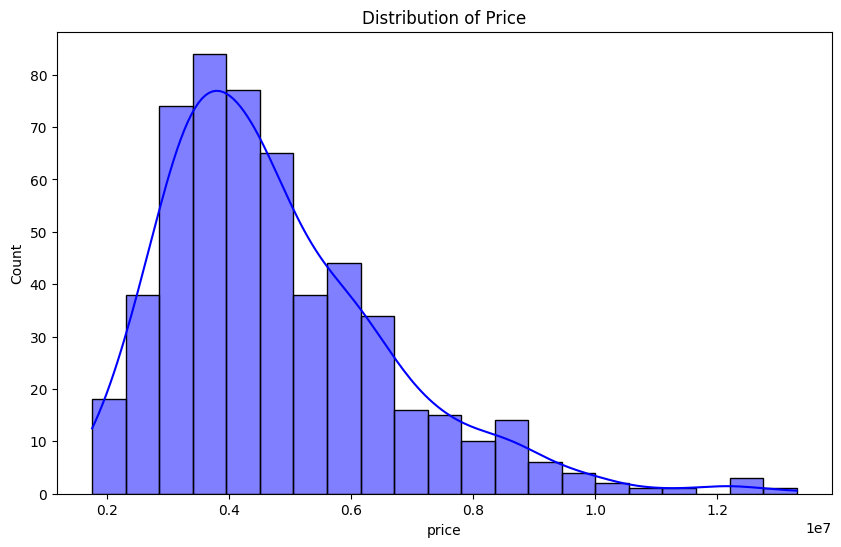

In [11]:
# Distribution of Price

plt.figure(figsize=(10,6))
sns.histplot(data = df, x ='price', kde=True, color= 'blue')
plt.title('Distribution of Price')
plt.show()

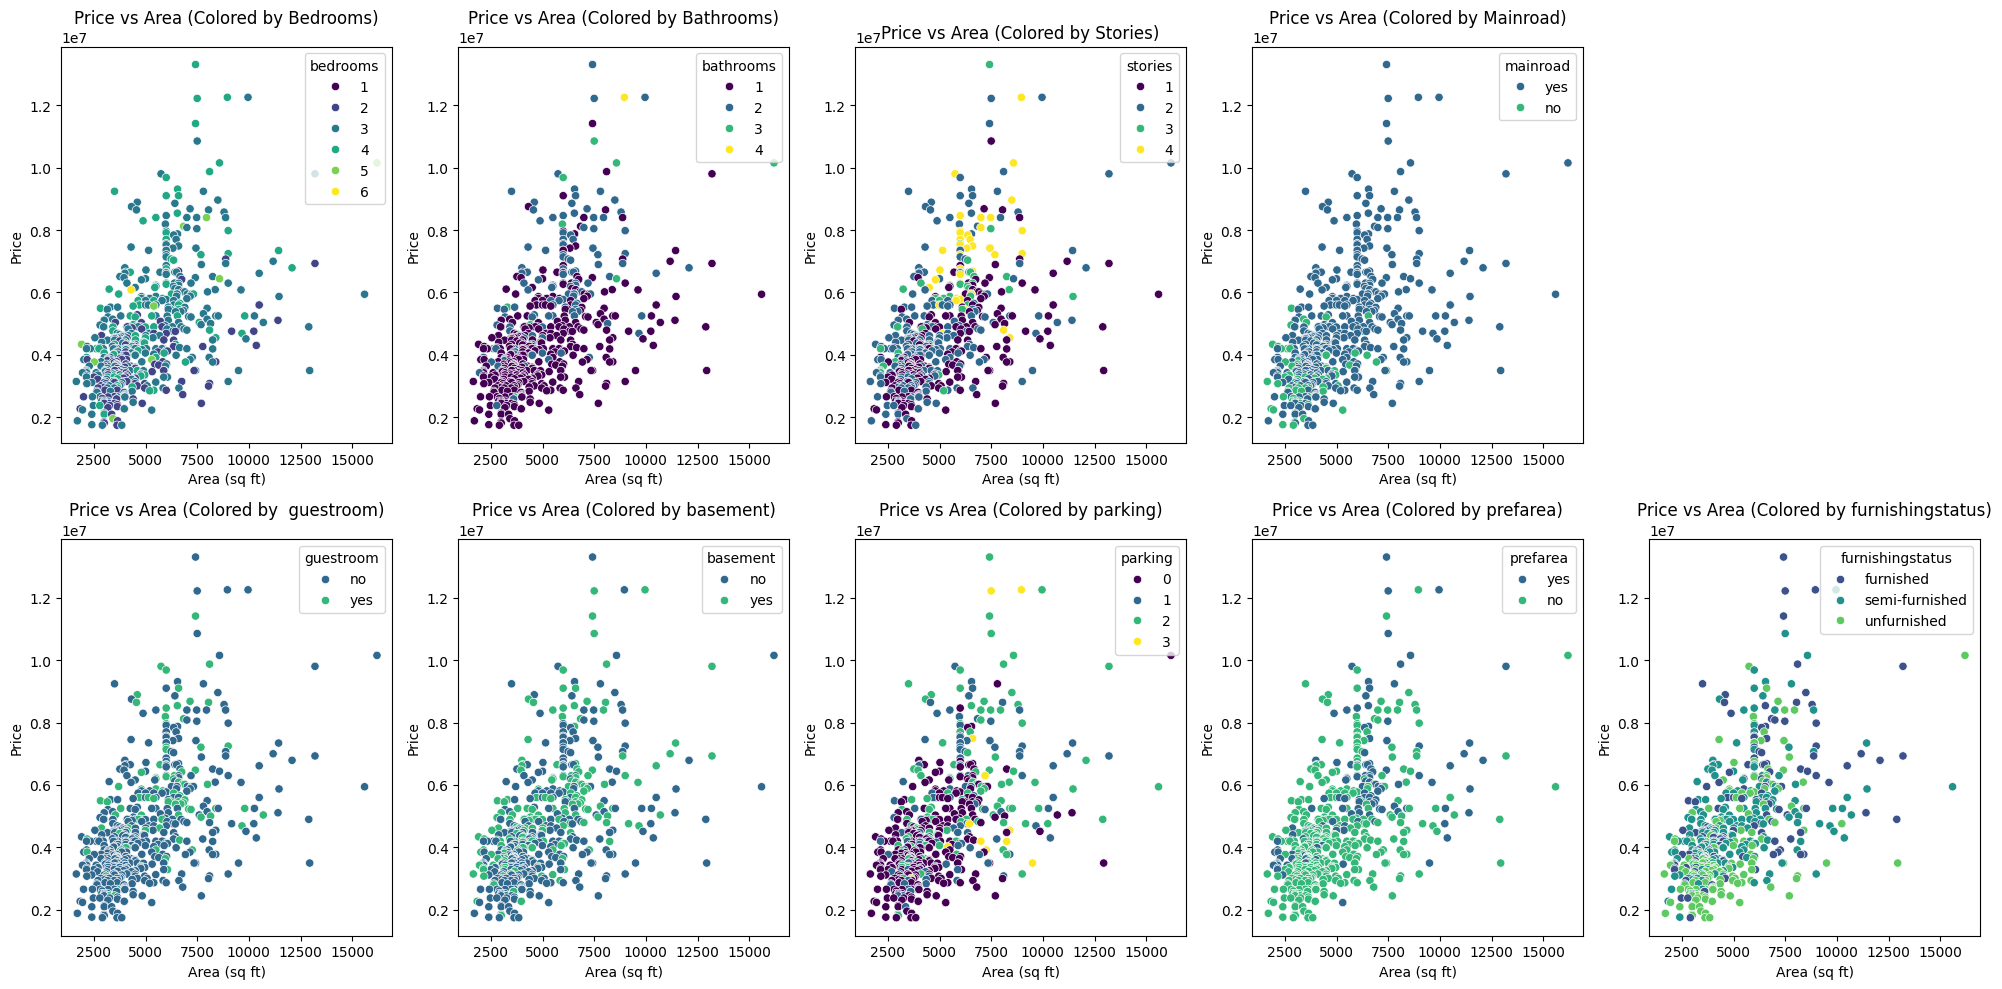

In [12]:
fig, axes = plt.subplots(2,5, figsize=(20, 10))

# Price vs Area colored by bedrooms
sns.scatterplot(x='area', y='price', data=df, hue='bedrooms', palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Price vs Area (Colored by Bedrooms)')
axes[0, 0].set_xlabel('Area (sq ft)')
axes[0, 0].set_ylabel('Price')

# Price vs Area colored by bathrooms
sns.scatterplot(x='area', y='price', data=df, hue='bathrooms', palette='viridis', ax=axes[0 ,1])
axes[0, 1].set_title('Price vs Area (Colored by Bathrooms)')
axes[0, 1].set_xlabel('Area (sq ft)')
axes[0, 1].set_ylabel('Price')

# Price vs Area colored by stories
sns.scatterplot(x='area', y='price', data=df, hue='stories', palette='viridis', ax=axes[0, 2])
axes[0, 2].set_title('Price vs Area (Colored by Stories)')
axes[0, 2].set_xlabel('Area (sq ft)')
axes[0, 2].set_ylabel('Price')

# Price vs Area colored by mainroad
sns.scatterplot(x='area', y='price', data=df, hue='mainroad', palette='viridis', ax=axes[0, 3])
axes[0, 3].set_title('Price vs Area (Colored by Mainroad)')
axes[0, 3].set_xlabel('Area (sq ft)')
axes[0, 3].set_ylabel('Price')

# Price vs Area colored by guestroom
sns.scatterplot(x='area', y='price', data=df, hue='guestroom', palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Price vs Area (Colored by  guestroom)')
axes[1, 0].set_xlabel('Area (sq ft)')
axes[1, 0].set_ylabel('Price')

# Delete the empty graph at position [0, 4]
axes[0, 4].remove()

# Price vs Area colored by basement
sns.scatterplot(x='area', y='price', data=df, hue='basement', palette='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Price vs Area (Colored by basement)')
axes[1, 1].set_xlabel('Area (sq ft)')
axes[1, 1].set_ylabel('Price')

# Price vs Area colored by parking
sns.scatterplot(x='area', y='price', data=df, hue='parking', palette='viridis', ax=axes[1, 2])
axes[1, 2].set_title('Price vs Area (Colored by parking)')
axes[1, 2].set_xlabel('Area (sq ft)')
axes[1, 2].set_ylabel('Price')

# Price vs Area colored by prefarea
sns.scatterplot(x='area', y='price', data=df, hue='prefarea', palette='viridis', ax=axes[1, 3])
axes[1, 3].set_title('Price vs Area (Colored by prefarea)')
axes[1, 3].set_xlabel('Area (sq ft)')
axes[1, 3].set_ylabel('Price')

# Price vs Area colored by furnishingstatus
sns.scatterplot(x='area', y='price', data=df, hue='furnishingstatus', palette='viridis', ax=axes[1, 4])
axes[1, 4].set_title('Price vs Area (Colored by furnishingstatus)')
axes[1, 4].set_xlabel('Area (sq ft)')
axes[1, 4].set_ylabel('Price')

plt.tight_layout()
plt.show()


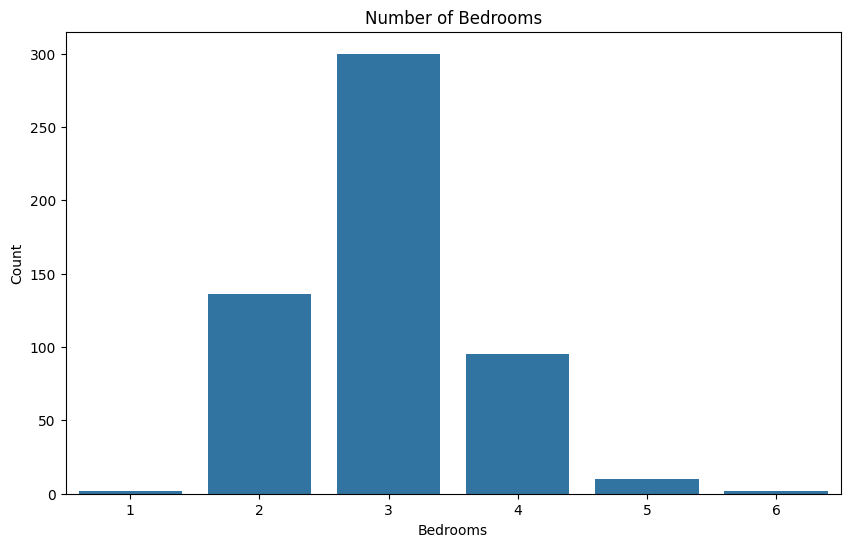

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bedrooms', data=df)
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

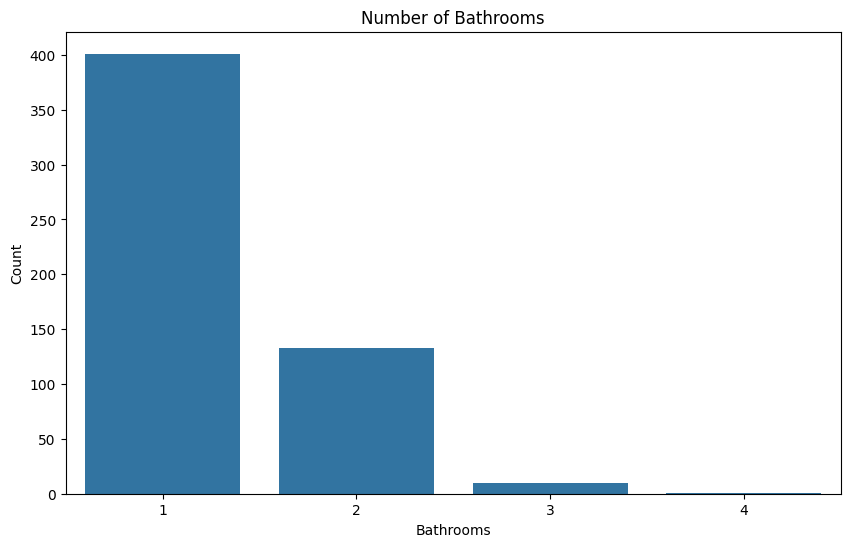

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bathrooms', data=df)
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.show()

In [15]:
# fucation do encodig all categrical features

def encode_features(df):
    for column in df.columns:
        if df[column].dtype == type(object):
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column])
    return df


In [16]:
# show data after encoding

df = encode_features(df)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


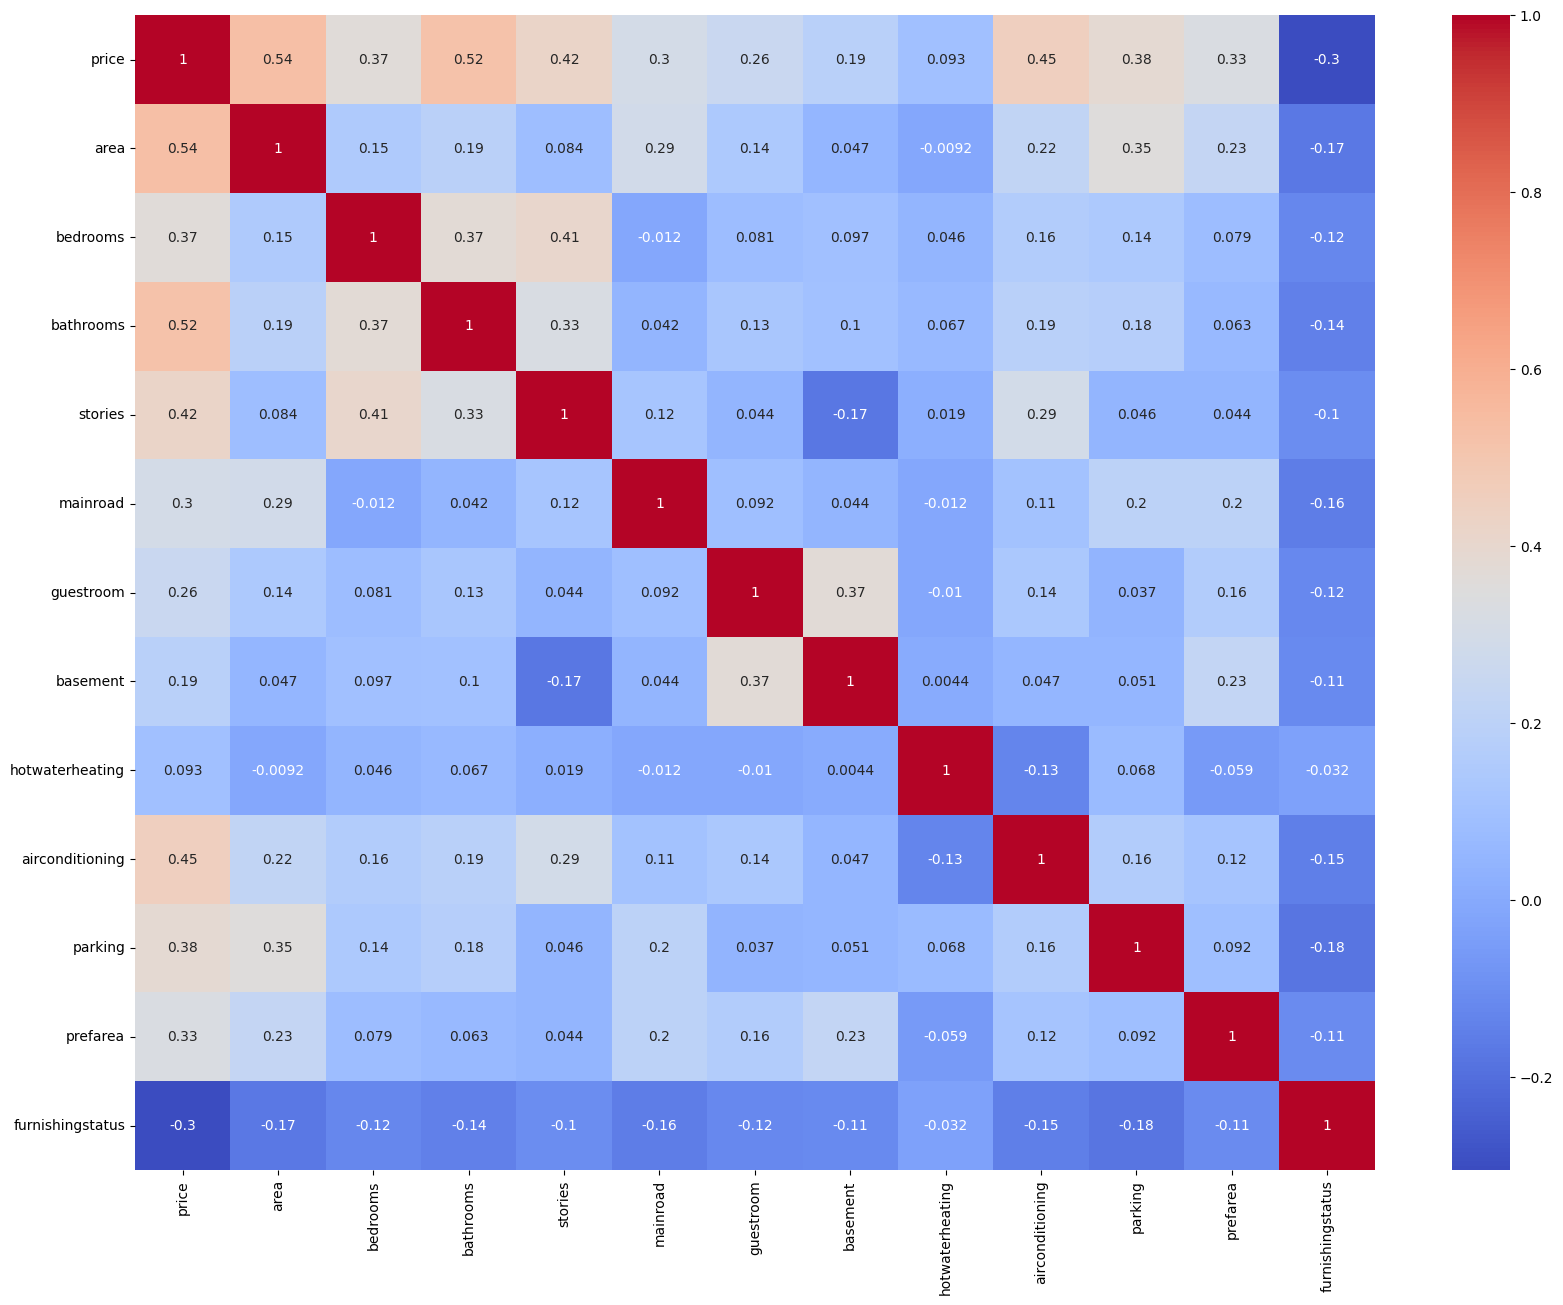

In [18]:
plt.figure(figsize=(20, 15))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [19]:
# correlation between featers and target

corr_matrix['price'].sort_values(ascending=False)

,price
price,1.000000
area,0.535997
bathrooms,0.517545
airconditioning,0.452954
stories,0.420712
parking,0.384394
bedrooms,0.366494
prefarea,0.329777
mainroad,0.296898
guestroom,0.255517


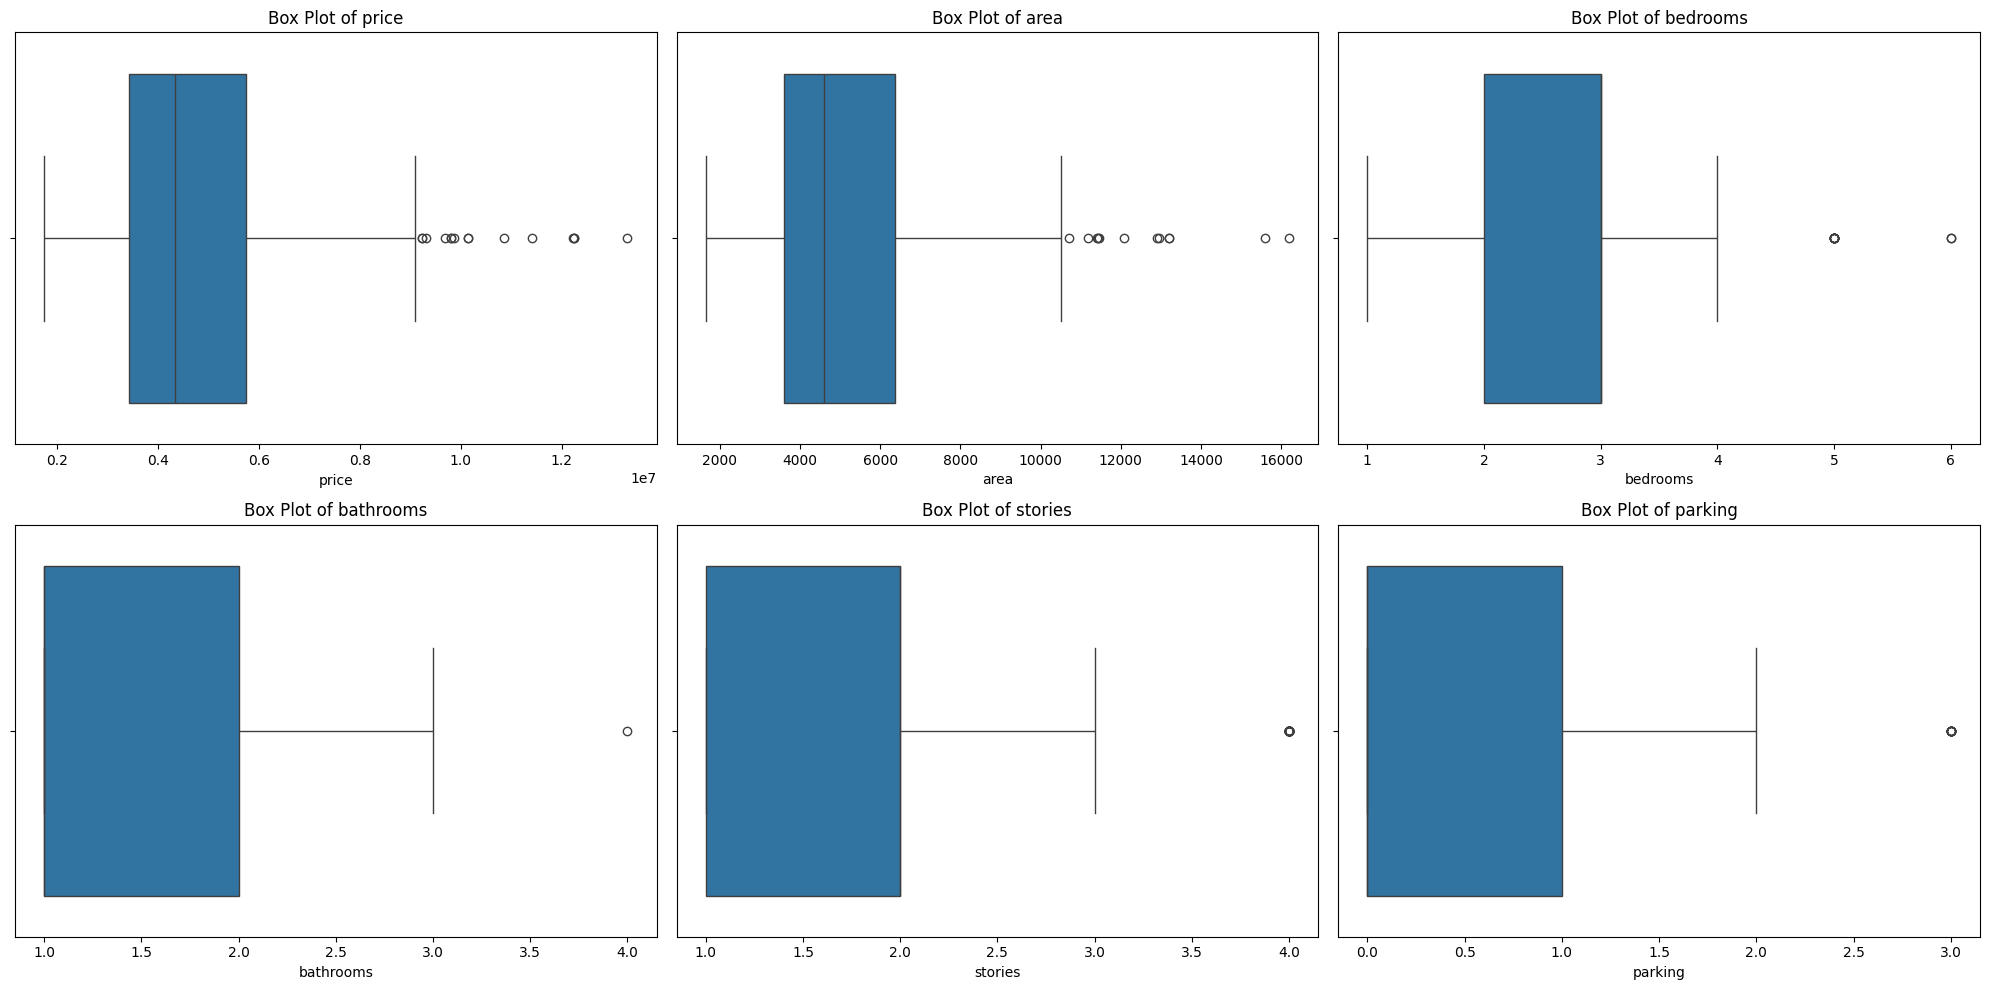

In [20]:
fig, axes = plt.subplots(2,3, figsize=(20, 10))

# Iterate through numerical columns and create box plots
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for i, col in enumerate(numerical_cols):
    row = i // 3
    col_idx = i % 3
    sns.boxplot(x=df[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


In [21]:
def detect_outliers_iqr(data, column):
    """
    Detects outliers in a given column of a DataFrame using the IQR method.

    Args:
        data: Pandas DataFrame containing the data.
        column: Name of the column to check for outliers.

    Returns:
        A list of indices corresponding to outlier values in the specified column.
    """

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data.index[(data[column] < lower_bound) | (data[column] > upper_bound)].tolist()

    return outliers


In [22]:
# show outliers

outliers = detect_outliers_iqr(df, 'price')
print(outliers)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [23]:
# show outliers

outliers = detect_outliers_iqr(df, 'area')
print(outliers)

[7, 10, 56, 64, 66, 69, 125, 129, 186, 191, 211, 403]


# Data Cleaning

In [24]:
# remove outliers

df = df.drop(outliers)

In [25]:
df.shape

(533, 13)

In [26]:
# reduce unimportance features with target

df = df.drop(columns=['furnishingstatus', 'guestroom'])

# Training test spliting

In [27]:
X = df.drop(columns=['price'])
y = df['price']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train.shape

(426, 10)

In [30]:
X_test.shape

(107, 10)

# Data Scalling

In [31]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Helpers

In [32]:
def pred_model(model, X_train_scaled, y_train, X_test_scaled, y_test):
    model.fit(X_train_scaled, y_train)

    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    print("R2 Score For Train: ", r2_score(y_train, y_pred_train))
    print("R2 Score For Test: ", r2_score(y_test, y_pred_test))

    print("MSE For Train: ", mean_squared_error(y_train, y_pred_train))
    print("MSE For Test: ", mean_squared_error(y_test, y_pred_test))

    print("MAE For Train: ", mean_absolute_error(y_train, y_pred_train))
    print("MAE For Test: ", mean_absolute_error(y_test, y_pred_test))

    print("RMSE For Train: ", np.sqrt(mean_squared_error(y_train, y_pred_train)))
    print("RMSE For Test: ", np.sqrt(mean_squared_error(y_test, y_pred_test)))

    print("MAPE For Train: ", mean_absolute_percentage_error(y_train, y_pred_train))
    print("MAPE For Test: ", mean_absolute_percentage_error(y_test, y_pred_test))



#Regression Models  

# Linear Regression model

In [33]:
pipeline = Pipeline([
    ('scaler',  MinMaxScaler()),
    ('regressor', LinearRegression())
])

In [34]:
param_grid = {
    'regressor__fit_intercept': [True, False],
    }

In [35]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

In [36]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [37]:
print("Best parameters found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best parameters found:  {'regressor__fit_intercept': True}


In [38]:
scores = cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validation scores: {scores}')

Cross-validation scores: [-1.27477542e+12 -1.06131623e+12 -8.67578808e+11 -1.07729893e+12
 -1.15655936e+12]


In [39]:
lr_model = grid_search.best_estimator_

In [40]:
y_pred =lr_model.predict(X_test_scaled)

In [41]:
pred_model(lr_model, X_train_scaled, y_train, X_test_scaled, y_test)

R2 Score For Train:  0.6667727533279975
R2 Score For Test:  0.6228708004800406
MSE For Train:  1018773982579.8103
MSE For Test:  1796962748266.6726
MAE For Train:  750728.3151059003
MAE For Test:  925856.3167053218
RMSE For Train:  1009343.342267541
RMSE For Test:  1340508.3917181096
MAPE For Train:  0.16999536361118256
MAPE For Test:  0.19775396461740258


# Polynomial Regression

In [42]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler',  MinMaxScaler()),
    ('model', LinearRegression())
])

In [43]:
# Define the parameter grid ...

param_grid = {
    'poly__degree': [2, 3, 4, 5],
    'model__fit_intercept': [True, False]
}

In [44]:
# Perform grid search ...

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('scaler', MinMaxScaler()),
                                       ('model', LinearRegression())]),
             param_grid={'model__fit_intercept': [True, False],
                         'poly__degree': [2, 3, 4, 5]},
             scoring='neg_mean_squared_error')

In [45]:
print("Best parameters:", grid_search.best_params_)
print("Best model:", grid_search.best_estimator_)

Best parameters: {'model__fit_intercept': False, 'poly__degree': 2}
Best model: Pipeline(steps=[('poly', PolynomialFeatures()), ('scaler', MinMaxScaler()),
                ('model', LinearRegression(fit_intercept=False))])


In [46]:
poly_model = grid_search.best_estimator_

In [47]:
y_pred = poly_model.predict(X_test_scaled)

In [48]:
pred_model(poly_model, X_train_scaled, y_train, X_test_scaled, y_test)

R2 Score For Train:  0.7260847004565847
R2 Score For Test:  0.6170979188478717
MSE For Train:  837439865414.3219
MSE For Test:  1824469643135.5
MAE For Train:  686198.0400448643
MAE For Test:  926982.3880949767
RMSE For Train:  915117.4052624734
RMSE For Test:  1350729.300465308
MAPE For Train:  0.16126326891293113
MAPE For Test:  0.19777048535828148


# Ridge Regression  

In [49]:
ridge = Ridge()
polynomial_features = PolynomialFeatures()
pipeline_ridge = Pipeline([
    ('poly', polynomial_features),
    ('scaler',  MinMaxScaler()),
    ('ridge', ridge)
])

In [50]:
param_grid_ridge = {
   'ridge__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0],
   'ridge__fit_intercept': [True, False],
   'poly__degree': [2, 3, 4, 5]
}

In [51]:
grid_search_ridge = GridSearchCV(pipeline_ridge, param_grid_ridge, cv=5)

In [52]:
grid_search_ridge.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('scaler', MinMaxScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'poly__degree': [2, 3, 4, 5],
                         'ridge__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0],
                         'ridge__fit_intercept': [True, False]})

In [53]:
print("Best Ridge parameters:", grid_search_ridge.best_params_)

Best Ridge parameters: {'poly__degree': 2, 'ridge__alpha': 10.0, 'ridge__fit_intercept': True}


In [54]:
ridge_model = grid_search_ridge.best_estimator_

In [55]:
y_pred = ridge_model.predict(X_test_scaled)

In [56]:
pred_model(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)

R2 Score For Train:  0.6930776549410521
R2 Score For Test:  0.626164876513106
MSE For Train:  938352139392.1793
MSE For Test:  1781266981593.312
MAE For Train:  717743.1156300461
MAE For Test:  918681.7804304013
RMSE For Train:  968685.7794931127
RMSE For Test:  1334641.143376493
MAPE For Train:  0.165504230360486
MAPE For Test:  0.1951484154971261


In [57]:
# show weights

weights = ridge_model.named_steps['ridge'].coef_

In [58]:
weights

array([ 0.00000000e+00,  6.12443909e+05,  1.33426313e+05,  5.40735695e+05,
        3.30531043e+05,  7.83119610e+04,  4.62693587e+04,  2.78212670e+04,
        1.37178928e+05,  1.05237087e+05,  1.19051647e+05,  2.00308478e+05,
        5.27137336e+05,  4.07027917e+05,  2.70189696e+05,  6.20855698e+05,
        4.32556679e+05,  1.94127379e+05,  3.49363173e+05,  1.12807470e+05,
        1.43987367e+05,  3.92175339e+04,  3.42656662e+05,  1.68674166e+05,
        1.80621060e+05,  1.76609753e+05,  1.25203749e+05,  1.72557639e+05,
        2.43364487e+05, -1.05897855e+01,  3.38813453e+05,  2.45528277e+05,
        5.43203715e+05, -9.83873366e+03,  1.88920775e+05,  5.00354253e+05,
        2.82764857e+05,  3.63837978e+05,  3.97542499e+05,  2.45628836e+05,
       -1.29339834e+05, -2.79878159e+04,  3.37828085e+05,  1.94172321e+05,
        4.44808626e+04,  7.83119610e+04,  5.73587637e+04,  1.02036642e+05,
        6.86867473e+04,  2.47569810e+05,  1.64322978e+05,  4.62693587e+04,
        9.68167464e+04,  

# Lasso Rgression

In [59]:
lasso = Lasso()
polynomial_features = PolynomialFeatures()
pipeline_lasso = Pipeline([
    ('poly', polynomial_features),
    ('scaler',  MinMaxScaler()),
    ('lasso', lasso)
])

In [60]:
param_grid_lasso = {
   'poly__degree': [2, 3, 4, 5],
   'lasso__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0],
   'lasso__fit_intercept': [True, False],
}

In [61]:
grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid_lasso, cv=5)

In [62]:
grid_search_lasso.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.889e+13, tolerance: 9.359e+10
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.183e+14, tolerance: 1.117e+11
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.068e+13, tolerance: 1.132e

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('scaler', MinMaxScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.1, 1.0, 10.0, 100.0, 1000.0],
                         'lasso__fit_intercept': [True, False],
                         'poly__degree': [2, 3, 4, 5]})

In [63]:
print("Best lasso parameters:", grid_search_lasso.best_params_)

Best lasso parameters: {'lasso__alpha': 1000.0, 'lasso__fit_intercept': True, 'poly__degree': 2}


In [64]:
lasso_model = grid_search_lasso.best_estimator_

In [65]:
y_pred = lasso_model.predict(X_test_scaled)

In [66]:
pred_model(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

R2 Score For Train:  0.734482638241402
R2 Score For Test:  0.6010851256481231
MSE For Train:  811764892530.3756
MSE For Test:  1900768144848.6328
MAE For Train:  669618.7713911007
MAE For Test:  919306.2401518777
RMSE For Train:  900979.9623356647
RMSE For Test:  1378683.482474724
MAPE For Train:  0.15533194666059602
MAPE For Test:  0.18898482989030915


In [67]:
# Show weights ..

weights = lasso_model.named_steps['lasso'].coef_
weights

array([ 0.00000000e+00,  2.14224550e+06, -0.00000000e+00,  1.05302488e+06,
        9.70426492e+05, -1.06569227e+05, -5.66126710e+04, -5.32529730e+02,
        8.18550732e+04, -0.00000000e+00,  9.20222476e+04, -2.81213685e+06,
        1.75824185e+06,  0.00000000e+00, -9.55875272e+05,  1.66135417e+06,
        5.47247518e+05,  0.00000000e+00,  6.07276808e+05,  1.07275714e+04,
       -0.00000000e+00, -1.93266671e+05, -1.05950037e+06, -1.64045400e+05,
        0.00000000e+00,  7.50857497e+05,  1.17091400e+06,  0.00000000e+00,
        6.58506427e+05, -6.29742168e+05,  3.59860370e+06, -8.55554838e+05,
        8.86378928e+05, -9.56330094e+05,  2.50504589e+05,  1.39173188e+06,
        0.00000000e+00,  9.00370189e+05,  8.86558318e+05,  0.00000000e+00,
       -2.78792984e+05, -4.06699501e+05,  4.58984745e+05,  1.86132274e+05,
        2.48918152e+05, -0.00000000e+00, -4.08845235e+04,  3.45908631e+04,
       -2.08366435e+05,  1.20854295e+06,  6.17471450e+05, -0.00000000e+00,
        0.00000000e+00,  

# Decision Tree Regressor

In [68]:
DT_Reg = DecisionTreeRegressor()

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [69]:
grid_search = GridSearchCV(estimator=DT_Reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [70]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [71]:
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [72]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

In [73]:
pred_model(best_model, X_train_scaled, y_train, X_test_scaled, y_test)

R2 Score For Train:  0.7300253885100538
R2 Score For Test:  0.4513462230958599
MSE For Train:  825392019680.1193
MSE For Test:  2614251031337.5366
MAE For Train:  688614.147712783
MAE For Test:  1066740.1631991663
RMSE For Train:  908510.880331171
RMSE For Test:  1616864.5680258865
MAPE For Train:  0.16287343572099383
MAPE For Test:  0.22131157044545363


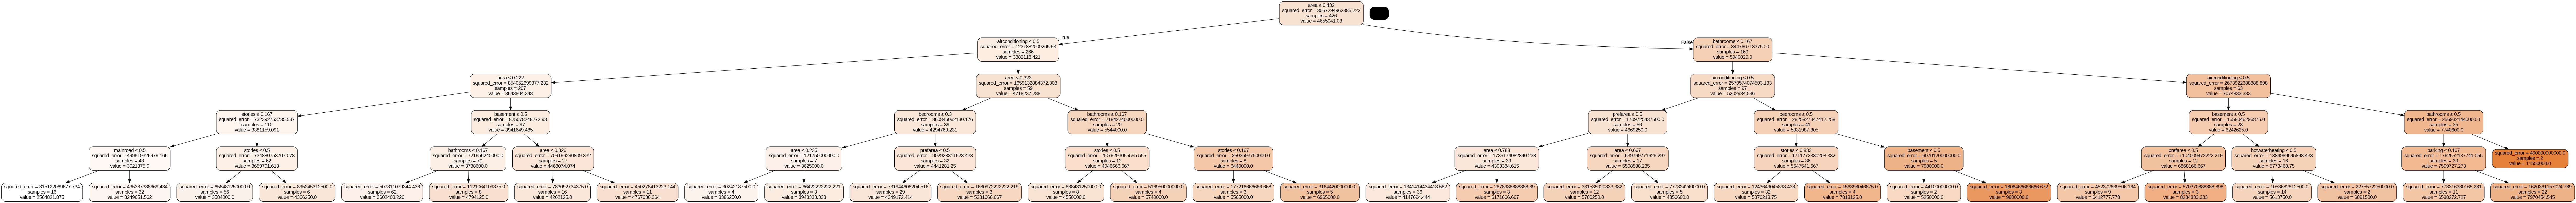

In [74]:
import pydotplus
from IPython.display import Image
dot_data = export_graphviz(best_model, out_file=None, feature_names=X_train.columns, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))

# Random Forest Regressor

In [83]:
RF_Reg = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [84]:
grid_search = GridSearchCV(estimator=RF_Reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

In [85]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [86]:
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [87]:
RF_model = grid_search.best_estimator_
y_pred = RF_model.predict(X_test_scaled)

In [88]:
pred_model(RF_model, X_train_scaled, y_train, X_test_scaled, y_test)

R2 Score For Train:  0.8868095142799195
R2 Score For Test:  0.5498275296122472
MSE For Train:  346056701781.9383
MSE For Test:  2145002722174.9524
MAE For Train:  438663.67752693547
MAE For Test:  982089.3582089752
RMSE For Train:  588265.8427802334
RMSE For Test:  1464582.7809225917
MAPE For Train:  0.1022526000481739
MAPE For Test:  0.20895626662437106


In [89]:
importances = RF_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

           Feature  Importance
0             area    0.512645
2        bathrooms    0.153024
7  airconditioning    0.076457
3          stories    0.060238
1         bedrooms    0.055812
8          parking    0.054988
5         basement    0.037293
9         prefarea    0.033026
4         mainroad    0.012616
6  hotwaterheating    0.003900


#**Conclusion**

# **Linear Regression & Polynomial Regression**
## Linear regression evaluation

Evaluation | Result
------------|--------------
R2-Score Train|0.66
R2-Score Test| 0.62
MSE Train |1018773982579.8103
MSE Test |1796962748266.6726
RMSE Train |1009343.34
RMSE Test |1340508.39
MAE Train |750728.3
MAE Test |925856.3
MAPE Train |16.9%
MAPE Test |19.7%

## Polynomial Regression evaluation  

Evaluation| Result
---------------|--------------------
R2-Score Train| 0.72
R2-Score Test |0.61
MSE Train |837439865414.3219
MSE Test |1824469643135.5
RMSE Train |915117.4052624734
RMSE Test |1350729.300465308
MAE Train|686198.0400448643
MAE Test |926982.3880949767
MAPE Train |16.13%
MAPE Test | 19.77%

________________________________________________________________________________
# **Ridge Regression & Lasso Regression**
## Ridge Regression Evaloution

Evaloution | Result
----------|------------
R2-Score Train  |0.69
R2-Score Test  |0.62
MSE Train |938352139392.1793
MSE Test |1781266981593.312
RMSE Train |968685.7794931127
RMSE Test |1334641.143376493
MAE Train | 717743.1156300461
MAE Test | 918681.7804304013
MAPE Train |16.55%
MAPE Test  | 19.51%








## Lasso Regression Evaloution

Evaloution |Result
---------------|-----------------
R2-Score Train|0.73
R2-Score Test|0.60
MSE Train |811764892530.3756
MSE Test | 1900768144848.6328
RMSE Train |900979.9623356647
RMSE Test |1378683.482474724
MAE Train |669618.7713911007
MAE Test |919306.2401518777
MAPE Train|15.53%
MAPE Test | 18.90%

________________________________________________________________________________
# **Decision Tree & Random Forest**
## Decision Tree Evaloution

Evaloution | Result
------------|-------------
R2-Score Train  |0.73
R2-Score Test |0.45
MSE Train | 825392019680.1193
MSE Test |2614251031337.5366
RMSE Train | 908510.880331171
RMSE Test |1616864.5680258865
MAE Train |688614.147712783
MAE Test |  1066740.1631991663
MAPE Train |16.29%
MAPE Test  | 22.13%








## Random Forest Evaloution

 Evaloution | Result
---------------|-----------------
R2-Score Train| 0.88
R2-Score Test |0.56
MSE Train |341794688784.1196
MSE Test |2081203581614.247
RMSE Train|  584632.0969499705
RMSE Test | 1442637.7166892064
MAE Train |437748.0301181934
MAE Test | 972232.389903801
MAPE Train |10.25%
MAPE Test |20.70%


# **Summary of the results obtained**

Models  | Conclusion
-------------------|------------------
**Linear Regression**|**Linear regression shows moderate performance with a noticeable gap between training and testing results, indicating some overfitting.**
|
|
**Polynomial Regression**|**Polynomial regression shows an improvement in training performance but overfits the training data, leading to lower performance on test data.**
|
|
**Ridge Regression** |**Ridge regression shows a balanced performance between training and testing, indicating a good generalization capability.**
|
|
**Lasso Regression**|**Lasso regression performs well on training data but shows some overfitting on test data.**
|
|
**Decision Tree** |**Decision tree shows significant overfitting, with much better performance on training data compared to test data.**
|
**Random Forest** |**Random forest shows excellent performance on training data but overfits the data, leading to a drop in performance on test data.**


# **Overall Conclusion** :

### Ridge regression and lasso regression show the most balanced performance between training and testing data, indicating good generalization capabilities. While random forest performs well on training data, it suffers from significant overfitting.